In [1]:
# This code is testing if I can correctly calculate the length of a line intersecting a polygon
import shapely

In [2]:
sq_sw = shapely.box(xmin=0, ymin=0, xmax=1, ymax=1)
sq_se = shapely.box(xmin=1, ymin=0, xmax=2, ymax=1)
sq_nw = shapely.box(xmin=0, ymin=1, xmax=1, ymax=2)
sq_ne = shapely.box(xmin=1, ymin=1, xmax=2, ymax=2)
four_sq = [sq_sw, sq_se, sq_nw, sq_ne]

tree = shapely.STRtree(four_sq)

ray = shapely.LineString([shapely.Point(0, 0.9), shapely.Point(1.1, 2)])

idxs = tree.query_nearest(ray)#, predicate="intersects")
idxs = tree.query(ray, predicate="intersects")

objs = [tree.geometries.take(i) for i in idxs]
objs # can this obj 

for obj in objs:
    intersection = ray.intersection(obj)
    print(intersection.length)

0.14142135623730948
1.2727922061357855
0.14142135623730964


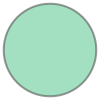

In [3]:
center_point = shapely.Point(0.5, 0.5)
circle = shapely.Point(0.5, 0.5).buffer(1.0, resolution=16)
circle

In [5]:
union = shapely.union_all(four_sq)
union.bounds

(0.0, 0.0, 2.0, 2.0)